In [0]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"wushidiguo","key":"ebbb05c154408b088bb86ee8ffbf0a30"}'}

In [0]:
# 在用户名目录（~）下创建一个隐藏（.）文件夹.kaggle。-p代表创建的文件夹在一个多层目录下。
!mkdir -p ~/.kaggle
# 将kaggle.json移动到.kaggle文件夹之下。
!mv kaggle.json ~/.kaggle/

In [10]:
from keras.applications import VGG16

# weights：定义加载的预学习权重；include_top：是否包含全连接层；input_shape：可选参数。不约定的话，可处理任何尺寸的输入。
conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(150, 150, 3))

Using TensorFlow backend.






58892288/58889256 [==============================] - 2s 0us/step








In [11]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [13]:
# 将train, validation, test统统从conv_base过一遍。
import os
import numpy as np
from keras.preprocessing import image

base_dir = "/content/drive/My Drive/DataSets/cats_and_dogs_small"
train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")
test_dir = os.path.join(base_dir, "test")

datagen = image.ImageDataGenerator(rescale=1/255)
batch_size = 20

def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512))
  labels = np.zeros(shape=(sample_count))
  # target_size=(height, width)
  generator = datagen.flow_from_directory(directory, target_size=(150, 150), batch_size=batch_size, class_mode="binary")
  i = 0
  for inputs_batch, labels_batch in generator:
    # 用predict进行特征提取
    features_batch = conv_base.predict(inputs_batch)
    features[i * batch_size : (i + 1) * batch_size] = features_batch
    labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= sample_count:
      break
  return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [18]:
import numpy as np
from keras import models, optimizers, layers

train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

model = models.Sequential()

model.add(layers.Dense(256, activation="relu", input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss="binary_crossentropy", metrics=["acc"])

history = model.fit(train_features, train_labels, epochs=30, batch_size=20, validation_data=(validation_features, validation_labels))



Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 5s 3ms/step - loss: 0.6083 - acc: 0.6625 - val_loss: 0.4467 - val_acc: 0.8350
Epoch 2/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.4374 - acc: 0.7995 - val_loss: 0.3616 - val_acc: 0.8660
Epoch 3/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.3593 - acc: 0.8475 - val_loss: 0.3182 - val_acc: 0.8790
Epoch 4/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.3110 - acc: 0.8675 - val_loss: 0.2975 - val_acc: 0.8880
Epoch 5/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2866 - acc: 0.8895 - val_loss: 0.2819 - val_acc: 0.8870
Epoch 6/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2637 - acc: 0.8950 - val_loss: 0.2699 - val_acc: 0.8890
Epoch 7/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2457 - acc: 0.9050 - val_loss: 0.2587 - val_acc: 0.9010
Epoch 8/30
2

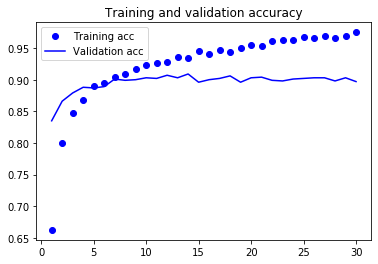

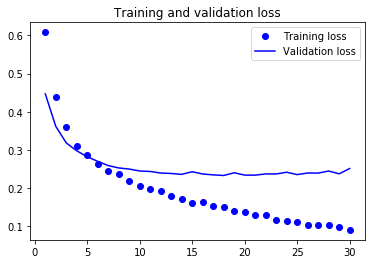

In [19]:
import matplotlib.pyplot as plt

acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [0]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [21]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.trainable_weights

[<tf.Variable 'block1_conv1/kernel:0' shape=(3, 3, 3, 64) dtype=float32_ref>,
 <tf.Variable 'block1_conv1/bias:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'block1_conv2/kernel:0' shape=(3, 3, 64, 64) dtype=float32_ref>,
 <tf.Variable 'block1_conv2/bias:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'block2_conv1/kernel:0' shape=(3, 3, 64, 128) dtype=float32_ref>,
 <tf.Variable 'block2_conv1/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'block2_conv2/kernel:0' shape=(3, 3, 128, 128) dtype=float32_ref>,
 <tf.Variable 'block2_conv2/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'block3_conv1/kernel:0' shape=(3, 3, 128, 256) dtype=float32_ref>,
 <tf.Variable 'block3_conv1/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'block3_conv2/kernel:0' shape=(3, 3, 256, 256) dtype=float32_ref>,
 <tf.Variable 'block3_conv2/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'block3_conv3/kernel:0' shape=(3, 3, 256, 256) dtype=float32_ref>,
 <tf.Variable 'block3_conv3

In [23]:
# 将conv_base冻结，学习的时候不进行更新。
conv_base.trainable = False
model.trainable_weights

[<tf.Variable 'dense_5/kernel:0' shape=(8192, 256) dtype=float32_ref>,
 <tf.Variable 'dense_5/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'dense_6/kernel:0' shape=(256, 1) dtype=float32_ref>,
 <tf.Variable 'dense_6/bias:0' shape=(1,) dtype=float32_ref>]

In [25]:
# data augmentation
train_datagen = image.ImageDataGenerator(rescale=1/255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode="nearest")

test_datagen = image.ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode="binary")

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode="binary")


model.compile(loss="binary_crossentropy", optimizer=optimizers.RMSprop(lr=2e-5), metrics=["acc"])

history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 667s 7s/step - loss: 0.5975 - acc: 0.6795 - val_loss: 0.4534 - val_acc: 0.8220
Epoch 2/30
100/100 [==============================] - 665s 7s/step - loss: 0.4737 - acc: 0.7890 - val_loss: 0.3732 - val_acc: 0.8590
Epoch 3/30
100/100 [==============================] - 666s 7s/step - loss: 0.4281 - acc: 0.8030 - val_loss: 0.3358 - val_acc: 0.8760
Epoch 4/30
100/100 [==============================] - 668s 7s/step - loss: 0.4136 - acc: 0.8130 - val_loss: 0.3069 - val_acc: 0.8740
Epoch 5/30
100/100 [==============================] - 666s 7s/step - loss: 0.3730 - acc: 0.8320 - val_loss: 0.3016 - val_acc: 0.8820
Epoch 6/30
100/100 [==============================] - 667s 7s/step - loss: 0.3812 - acc: 0.8315 - val_loss: 0.2798 - val_acc: 0.8930
Epoch 7/30
100/100 [==============================] - 663s 7s/step - loss: 0.3609 - acc: 0.8440 - val_loss: 0.2761 - v

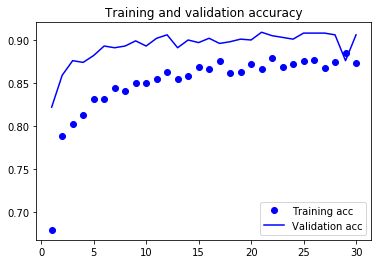

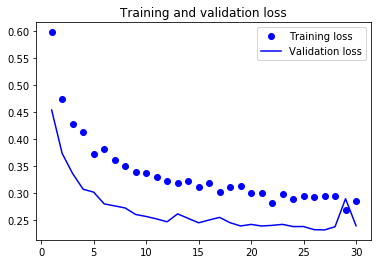

In [26]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [0]:
# fine tuning
# 将最顶上的三个卷积层解冻。
for layer in conv_base.layers[-4: -1]:
  layer.trainable = True

In [0]:
# 使用一个较小的学习率，以免原有参数产生较大波动。
model.compile(loss="binary_crossentropy", optimizer=optimizers.RMSprop(lr=1e-5), metrics=["acc"])

history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100, validation_data=validation_generator, validation_steps=50)

Epoch 1/100
100/100 [==============================] - 669s 7s/step - loss: 0.2755 - acc: 0.8845 - val_loss: 0.2396 - val_acc: 0.9050
Epoch 2/100
100/100 [==============================] - 663s 7s/step - loss: 0.2909 - acc: 0.8760 - val_loss: 0.2547 - val_acc: 0.8940
Epoch 3/100
100/100 [==============================] - 665s 7s/step - loss: 0.2745 - acc: 0.8820 - val_loss: 0.2330 - val_acc: 0.9060
Epoch 4/100
100/100 [==============================] - 668s 7s/step - loss: 0.2837 - acc: 0.8810 - val_loss: 0.2342 - val_acc: 0.9110
Epoch 5/100
100/100 [==============================] - 666s 7s/step - loss: 0.2765 - acc: 0.8805 - val_loss: 0.2388 - val_acc: 0.9020
Epoch 6/100
100/100 [==============================] - 668s 7s/step - loss: 0.2794 - acc: 0.8800 - val_loss: 0.2356 - val_acc: 0.9080
Epoch 7/100
100/100 [==============================] - 669s 7s/step - loss: 0.2856 - acc: 0.8770 - val_loss: 0.2334 - val_acc: 0.9150
Epoch 8/100
100/100 [==============================] - 669s 7s

In [0]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [0]:
# 指数移动平均
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs, smoothed_curve(acc), "bo", label="Smoothed training acc")
plt.plot(epochs, smoothed_curve(val_acc), "b", label="Smoothed validation acc")
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, smoothed_curve(loss), "bo", label="Smoothed training loss")
plt.plot(epochs, smoothed_curve(val_loss), "b", label="Smoothed validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [0]:
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=20, class_mode="binary")

test_loss, test_acc = mdoel.evaluate_generator(test_generator, steps=50)

print("test acc:", test_acc)

In [0]:
model.save("/content/drive/My Drive/Colab Notebooks/cats_and_dogs_using_VGG16.h5")